In [1]:
!pip install -q wheel pandas seaborn matplotlib gensim numpy --upgrade

You should consider upgrading via the '/home/dominik/.pyenv/versions/3.9.4/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
import sys
import os

import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from gensim.utils import simple_preprocess

sys.path.append("..")
from load_data import parse_theses

In [3]:
theses = parse_theses("../data/sample_data.csv")

In [4]:
df = pd.DataFrame([t.__dict__ for t in theses])

In [5]:
print(f"Theses in dataset: {len(df)}")

Theses in dataset: 1520


In [6]:
df

,author_name,author_id,topic,language,cs_abstract,en_abstract,keywords,evaluation,reader,supervisor,description
0,Mgr. Samuel Adámik,422384,Portál otevřených dat obce: Případová studie\t,Language.sla,V súčasnosti je trendom zoskupovanie dát do po...,The data grouping into OpenData currently repr...,"[OpenData, Lelekovice, Dátový portál, Katalóg ...",Evaluation.E,"Ing. Jaroslav Zelený, CSc.\t","Ing. Leonard Walletzký, Ph.D.",Cílem práce je provést analýzu prezentace dat ...
1,Bc. Jan Adler,469190,Digitální knihovna pro Archiv MU\t,Language.cze,Cílem této práce je vyvinout digitální knihovn...,The goal of this thesis is to create a digital...,"[Islandora, Drupal, Fedora, digitální knihovna...",Evaluation.A,Mgr. Petr Kovács\t,Mgr. Vlastimil Krejčíř,Cílem práce je vytvořit digitální knihovnu pro...
2,Mgr. Bc. Lukáš Adler,15067,Detekce propagandy\t,Language.cze,Tato bakalářská práce shrnuje aktuální poznatk...,This bachelor thesis sums up current findings ...,"[detekce propagandy, neuronové sítě, hluboké u...",Evaluation.B,RNDr. Ondřej Herman\t,"doc. RNDr. Aleš Horák, Ph.D.",<p>\tV rámci projektu <a href='https://nlp.fi....
3,RNDr. Deniz Agaoglu Cagirici,459192,Isomorphism problem for geometric intersection...,Language.eng,\t,Graph Isomorphism Problem is one of the well-k...,"[interval graphs, chordal graphs, geometric gr...",Evaluation.C,Dr. rer. nat. Achim Blumensath\t,"prof. RNDr. Petr Hliněný, Ph.D.",The fundamental graph isomorphism problem is b...
4,Mgr. Michal Ajdarów,422654,Markovovy rozhodovací procesy s neúplnou infor...,Language.eng,Energeticky observovatelné Consumption partial...,An energy-observable Consumption partially Obs...,"[Reachability, Safety, Buchi, consumption mode...",Evaluation.B,RNDr. David Klaška\t,"RNDr. Petr Novotný, Ph.D.",The aim of the thesis is to develop new algori...
...,...,...,...,...,...,...,...,...,...,...,...
1515,Bc. Tomáš Žilínek,485115,Návrh a implementácia desktopovej multiplatfor...,Language.sla,Cieľom tejto bakalárskej práce je porovnať vyb...,This thesis aims to compare several cross plat...,"[MySQL, MariaDB, Excel, xlsx, desktopová aplik...",Evaluation.C,"RNDr. Jaroslav Pelikán, Ph.D.\t","Mgr. Luděk Bártek, Ph.D.",Cílem práce je návrh a vývoj multiplatformní a...
1516,Mgr. Peter Žiška,487569,Mobile Augmented Reality Social Interface\t,Language.eng,"Diplomová práca sa zaoberá analýzou, návrhom a...","The Master's thesis deals with the analysis, d...","[Indoor positioning, BLE, Trilateration, Andro...",Evaluation.E,"Mgr. Jiří Chmelík, Ph.D.\t","doc. RNDr. Tomáš Pitner, Ph.D.",This thesis is about creating a novel app for ...
1517,Mgr. Jozef Živčic,422777,Prezentácia výsledkov NIST STS\t,Language.sla,Náhodné čísla sú využívané v rozličných druhoc...,Random numbers are utilized in various types o...,"[NIST STS, CRoCS, testy náhodnosti, grafy, gra...",Evaluation.B,"Mgr. Marek Sýs, Ph.D.\t","Ing. Mgr. et Mgr. Zdeněk Říha, Ph.D.",Věnujte se problematice testů náhodnosti dle N...
1518,Mgr. Šimon Žulták,424096,Digital Transformation based on Business Proce...,Language.eng,"Technologický pokrok, v posledních letech, tla...","Technological progress in the recent years, is...","[Digital Transformation, Business model, Busin...",Evaluation.B,"Ing. Leonard Walletzký, Ph.D.\t","doc. Mouzhi Ge, Ph.D.",Digital transformation is to use up-to-date di...


In [7]:
df.author_name.value_counts()

Mgr. Jan Duda            2
Mgr. Samuel Adámik       1
Bc. Michal Petr          1
Bc. Xuan Linh Phamová    1
Bc. Klára Petrovičová    1
                        ..
Bc. Jan Jedelský         1
Mgr. Tomáš Javorský      1
Mgr. Peter Javorka       1
Mgr. Alica Jašková       1
Mgr. Marek Žuži          1
Name: author_name, Length: 1519, dtype: int64

In [8]:
df.author_id.value_counts()

422384    1
485683    1
469299    1
485705    1
422592    1
         ..
461471    1
445316    1
445500    1
422223    1
410334    1
Name: author_id, Length: 1520, dtype: int64

In [9]:
# Interestingly, we have two theses in the dataset from two different people but with same name (including title)

In [10]:
df.topic
# Topic ends with '\t'

0          Portál otevřených dat obce: Případová studie\t
1                      Digitální knihovna pro Archiv MU\t
2                                    Detekce propagandy\t
3       Isomorphism problem for geometric intersection...
4       Markovovy rozhodovací procesy s neúplnou infor...
                              ...                        
1515    Návrh a implementácia desktopovej multiplatfor...
1516          Mobile Augmented Reality Social Interface\t
1517                     Prezentácia výsledkov NIST STS\t
1518    Digital Transformation based on Business Proce...
1519    Odstranění zamlžení v podvodních obrázcích a j...
Name: topic, Length: 1520, dtype: object

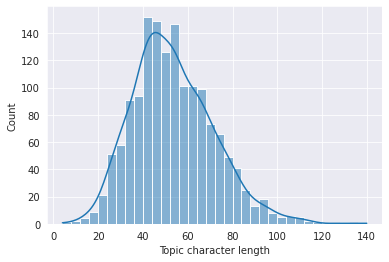

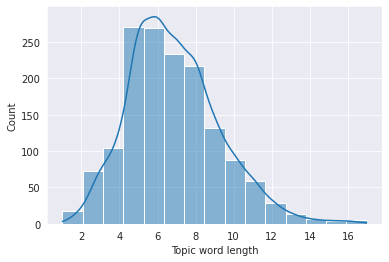

In [11]:
counts = df.topic.apply(lambda t: len(t.strip()))
ax = sns.histplot(data=counts, kde=True)
ax.set(xlabel="Topic character length", ylabel="Count")
plt.show()

counts = df.topic.apply(lambda t: len(t.strip().split(" ")))
ax = sns.histplot(data=counts, kde=True, bins=15)
ax.set(xlabel="Topic word length", ylabel="Count")
plt.show()

In [12]:
df.language.value_counts()

# Roughly 50:25:25 split for english:slovak:czech

Language.eng    779
Language.sla    388
Language.cze    353
Name: language, dtype: int64

In [13]:
print(repr(df.cs_abstract[0]))
df.cs_abstract
# Cs abstract ends with '\t

'V súčasnosti je trendom zoskupovanie dát do podoby OpenData. Cieľom je dosiahnuť aby dáta boli dostupné centrálne a mala k nim tak prístup široká verejnosť. Tento sektor umožňuje zefektívnenie štátnej správy, zrýchlenie vývoja technológií, ekologickejšieho využitia dostupných zdrojov, či napríklad rýchlejšiu identifikáciu kradnutých zariadení. Najväčším problémom je, že síce tieto dáta podľa legislatívy dostupné sú, ale zároveň sú roztrieštené medzi rôzne oddelenia, ľudí, ktorí za ne zodpovedajú a tak nie sú centrálne jednoducho prístupné. Rovnaký problém je aj s ich aktuálnosťou a formátom v ktorom sú uchované. Ten je často veľmi rozdielny. Cieľom tejto diplomovej práce bolo vytvoriť portál otvorených dát pre obec Lelekovice. Bolo teda potrebné zistiť aké dáta nám obec s približne 1800 obyvateľmi môže poskytnúť, ako tieto dáta zbiera a ako ich ukladá. Na základe toho sme vytvorili webový portál CKAN. Tam kde to bolo možné sme previedli strojovo spracovateľné dáta pomocou skriptov v j

0       V súčasnosti je trendom zoskupovanie dát do po...
1       Cílem této práce je vyvinout digitální knihovn...
2       Tato bakalářská práce shrnuje aktuální poznatk...
3                                                      \t
4       Energeticky observovatelné Consumption partial...
                              ...                        
1515    Cieľom tejto bakalárskej práce je porovnať vyb...
1516    Diplomová práca sa zaoberá analýzou, návrhom a...
1517    Náhodné čísla sú využívané v rozličných druhoc...
1518    Technologický pokrok, v posledních letech, tla...
1519    Odstránenie zahmlenia sa používa v mnohých odv...
Name: cs_abstract, Length: 1520, dtype: object

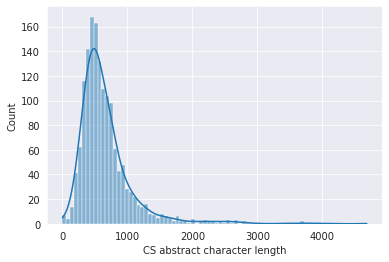

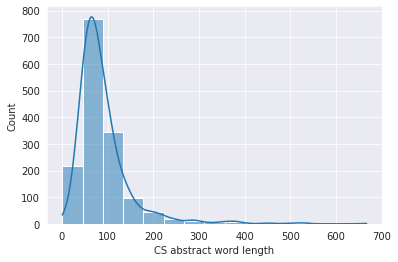

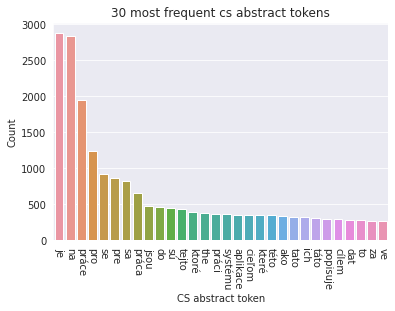

In [31]:
counts = df.cs_abstract.apply(lambda t: len(t.strip()))
ax = sns.histplot(data=counts, kde=True)
ax.set(xlabel="CS abstract character length", ylabel="Count")
plt.show()

counts = df.cs_abstract.apply(lambda t: len(t.strip().split(" ")))
ax = sns.histplot(data=counts, kde=True, bins=15)
ax.set(xlabel="CS abstract word length", ylabel="Count")
plt.show()

toks = []
for text in df.cs_abstract:
    toks.extend(simple_preprocess(text))
toks = pd.Series(toks).value_counts().reset_index()
ax = sns.barplot(x="index", y=0, data=toks.sort_values(by=[0], ascending=False)[:30])
ax.set(xlabel="CS abstract token", ylabel="Count", title="30 most frequent cs abstract tokens")
plt.xticks(rotation=270)
plt.show()

Total tokens: 24607; Max_df: 23376.649999999998; Min_df: 1230.3500000000001
Tokens that are less freq than Max_df but more than Min_df: 4


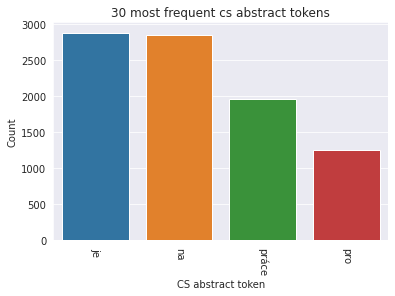

In [32]:
toks = toks.sort_values(by=[0], ascending=False)
max_df = 0.95
min_df = 0.05
print(f"Total tokens: {len(toks)}; Max_df: {max_df * len(toks)}; Min_df: {min_df * len(toks)}")
mask = toks[0].apply(lambda v: v <= max_df * len(toks) and v >= min_df * len(toks))
filtered_toks = toks[mask]
print(f"Tokens that are less freq than Max_df but more than Min_df: {len(filtered_toks)}")
ax = sns.barplot(x="index", y=0, data=filtered_toks.sort_values(by=[0], ascending=False)[:30])
ax.set(xlabel="CS abstract token", ylabel="Count", title="30 most frequent cs abstract tokens")
plt.xticks(rotation=270)
plt.show()

In [16]:
print(repr(df.en_abstract[0]))
df.en_abstract

'The data grouping into OpenData currently represents the hot topic. The main intention is to provide the open access platform for general public. This sector enables the streamlining of the state administration, the acceleration of the development of technologies, the more ecological use of available resources, or, for instance, the faster and effective identification of stolen equipment. The biggest problem is that while these data are available under the legislation, they are also fragmented between different departments, the people who are responsible for them and so they are not easily accessible centrally. The same problem is with their timeliness and the format in which they are stored. It is often very different. The aim of this diploma thesis was to create an open data platform for the municipality of Lelekovice with approximately 1800 inhabitants. First, it was essential to determine the following: what can be shared, how the data are obtained and where the data are stored. A

0       The data grouping into OpenData currently repr...
1       The goal of this thesis is to create a digital...
2       This bachelor thesis sums up current findings ...
3       Graph Isomorphism Problem is one of the well-k...
4       An energy-observable Consumption partially Obs...
                              ...                        
1515    This thesis aims to compare several cross plat...
1516    The Master's thesis deals with the analysis, d...
1517    Random numbers are utilized in various types o...
1518    Technological progress in the recent years, is...
1519    Dehazing is used in many areas to improve the ...
Name: en_abstract, Length: 1520, dtype: object

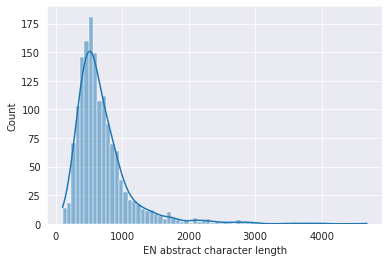

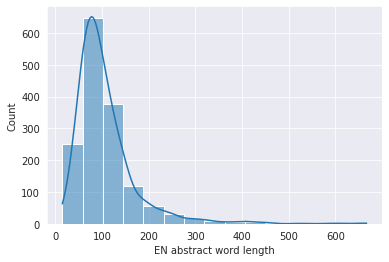

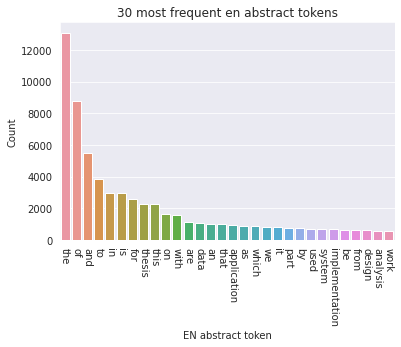

In [33]:
counts = df.en_abstract.apply(lambda t: len(t.strip()))
ax = sns.histplot(data=counts, kde=True)
ax.set(xlabel="EN abstract character length", ylabel="Count")
plt.show()

counts = df.en_abstract.apply(lambda t: len(t.strip().split(" ")))
ax = sns.histplot(data=counts, kde=True, bins=15)
ax.set(xlabel="EN abstract word length", ylabel="Count")
plt.show()

toks = []
for text in df.en_abstract:
    toks.extend(simple_preprocess(text))
toks = pd.Series(toks).value_counts().reset_index()
ax = sns.barplot(x="index", y=0, data=toks.sort_values(by=[0], ascending=False)[:30])
ax.set(xlabel="EN abstract token", ylabel="Count", title="30 most frequent en abstract tokens")
plt.xticks(rotation=270)
plt.show()

Total tokens: 9169; Max_df: 8710.55; Min_df: 458.45000000000005
Tokens that are less freq than Max_df but more than Min_df: 33


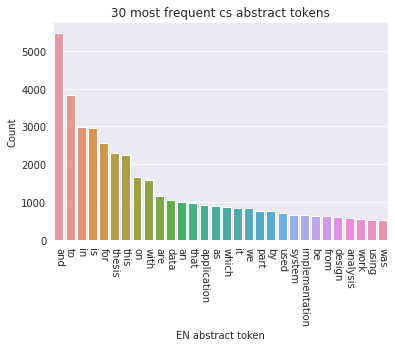

In [34]:
toks = toks.sort_values(by=[0], ascending=False)
max_df = 0.95
min_df = 0.05
print(f"Total tokens: {len(toks)}; Max_df: {max_df * len(toks)}; Min_df: {min_df * len(toks)}")
mask = toks[0].apply(lambda v: v <= max_df * len(toks) and v >= min_df * len(toks))
filtered_toks = toks[mask]
print(f"Tokens that are less freq than Max_df but more than Min_df: {len(filtered_toks)}")
ax = sns.barplot(x="index", y=0, data=filtered_toks.sort_values(by=[0], ascending=False)[:30])
ax.set(xlabel="EN abstract token", ylabel="Count", title="30 most frequent cs abstract tokens")
plt.xticks(rotation=270)
plt.show()

In [18]:
df.keywords

0       [OpenData, Lelekovice, Dátový portál, Katalóg ...
1       [Islandora, Drupal, Fedora, digitální knihovna...
2       [detekce propagandy, neuronové sítě, hluboké u...
3       [interval graphs, chordal graphs, geometric gr...
4       [Reachability, Safety, Buchi, consumption mode...
                              ...                        
1515    [MySQL, MariaDB, Excel, xlsx, desktopová aplik...
1516    [Indoor positioning, BLE, Trilateration, Andro...
1517    [NIST STS, CRoCS, testy náhodnosti, grafy, gra...
1518    [Digital Transformation, Business model, Busin...
1519    [dehazing, image restoration, underwater image...
Name: keywords, Length: 1520, dtype: object

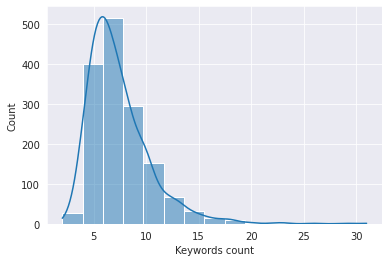

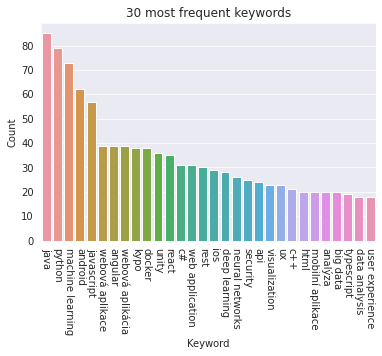

In [19]:
counts = df.keywords.apply(lambda l: len(l))
ax = sns.histplot(data=counts, kde=True, bins=15)
ax.set(xlabel="Keywords count", ylabel="Count")
plt.show()

toks = []
for text in df.keywords:
    toks.extend([kw.lower().strip() for kw in text])
toks = pd.Series(toks).value_counts().reset_index()
ax = sns.barplot(x="index", y=0, data=toks.sort_values(by=[0], ascending=False)[:30])
ax.set(xlabel="Keyword", ylabel="Count", title="30 most frequent keywords")
plt.xticks(rotation=270)
plt.show()

In [20]:
df.evaluation.value_counts()

Evaluation.A    634
Evaluation.B    363
Evaluation.C    286
Evaluation.D    117
Evaluation.E     97
Evaluation.O     22
Evaluation.P      1
Name: evaluation, dtype: int64

In [21]:
df.evaluation.value_counts().reset_index()

,index,evaluation
0,Evaluation.A,634
1,Evaluation.B,363
2,Evaluation.C,286
3,Evaluation.D,117
4,Evaluation.E,97
5,Evaluation.O,22
6,Evaluation.P,1


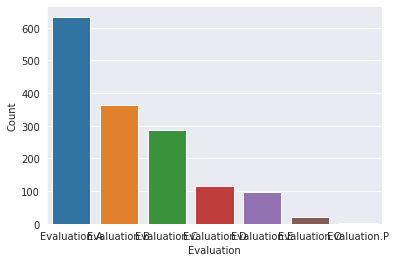

In [22]:
counts = df.evaluation.value_counts().reset_index()
counts["index"] = counts["index"].apply(lambda e: str(e))
ax = sns.barplot(data=counts, y="evaluation", x="index")
plt.xlabel("Evaluation")
plt.ylabel("Count")
plt.show()

In [23]:
df.reader
# Reader contains '\t'

0           Ing. Jaroslav Zelený, CSc.\t
1                     Mgr. Petr Kovács\t
2                  RNDr. Ondřej Herman\t
3       Dr. rer. nat. Achim Blumensath\t
4                   RNDr. David Klaška\t
                      ...               
1515     RNDr. Jaroslav Pelikán, Ph.D.\t
1516          Mgr. Jiří Chmelík, Ph.D.\t
1517             Mgr. Marek Sýs, Ph.D.\t
1518     Ing. Leonard Walletzký, Ph.D.\t
1519       doc. Fotios Liarokapis, PhD\t
Name: reader, Length: 1520, dtype: object

In [24]:
df.reader.value_counts()
# 478 different readers

doc. RNDr. Petr Švenda, Ph.D.\t              27
RNDr. Adam Rambousek, Ph.D.\t                26
doc. Ing. RNDr. Barbora Bühnová, Ph.D.\t     23
Mgr. Luděk Bártek, Ph.D.\t                   22
Mgr. Peter Halmo\t                           21
                                             ..
Ing. Roman Klimeš\t                           1
Frederik Garbe, PhD\t                         1
Mgr. Roman Leontovyč\t                        1
RNDr. Petr Škoda, CSc.\t                      1
Mgr. Jiří Víšek,RNDr. Vít Rusňák, Ph.D.\t     1
Name: reader, Length: 478, dtype: int64

In [25]:
df.supervisor

0              Ing. Leonard Walletzký, Ph.D.
1                     Mgr. Vlastimil Krejčíř
2               doc. RNDr. Aleš Horák, Ph.D.
3            prof. RNDr. Petr Hliněný, Ph.D.
4                  RNDr. Petr Novotný, Ph.D.
                        ...                 
1515                Mgr. Luděk Bártek, Ph.D.
1516          doc. RNDr. Tomáš Pitner, Ph.D.
1517    Ing. Mgr. et Mgr. Zdeněk Říha, Ph.D.
1518                   doc. Mouzhi Ge, Ph.D.
1519                  RNDr. Jan Čejka, Ph.D.
Name: supervisor, Length: 1520, dtype: object

In [26]:
df.supervisor.value_counts()

doc. RNDr. Tomáš Pitner, Ph.D.             62
doc. Ing. RNDr. Barbora Bühnová, Ph.D.     40
doc. RNDr. Petr Švenda, Ph.D.              35
Ing. Leonard Walletzký, Ph.D.              34
prof. RNDr. Václav Matyáš, M.Sc., Ph.D.    34
                                           ..
RNDr. Vladimír Štill, Ph.D.                 1
Mgr. Michal Štefánik                        1
RNDr. JUDr. Vladimír Šmíd, CSc.             1
RNDr. Pavel Šmerk, Ph.D.                    1
MgA. Kateřina Spáčilová                     1
Name: supervisor, Length: 223, dtype: int64

In [27]:
print(repr(df.description[0]))
df.description

'Cílem práce je provést analýzu prezentace dat vybrané obce, na základě zkušeností a práce v Laboratoři servisních systémů vybrat vhodnou platformu pro prezentaci těchto dat a navrhnout základní postupy při jejím plnění a údržbě včetně potřebných procesů na straně obce. Výstupem práce bude základní koncept portálu Otevřených dat, splňujících základní požadavky, včetně Otevřených formálních norem a napojení na Národní katalog otevřených dat.'


0       Cílem práce je provést analýzu prezentace dat ...
1       Cílem práce je vytvořit digitální knihovnu pro...
2       <p>\tV rámci projektu <a href='https://nlp.fi....
3       The fundamental graph isomorphism problem is b...
4       The aim of the thesis is to develop new algori...
                              ...                        
1515    Cílem práce je návrh a vývoj multiplatformní a...
1516    This thesis is about creating a novel app for ...
1517    Věnujte se problematice testů náhodnosti dle N...
1518    Digital transformation is to use up-to-date di...
1519    Describe conditions that affect underwater ima...
Name: description, Length: 1520, dtype: object

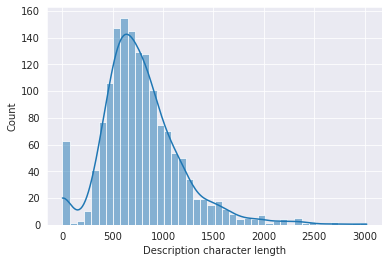

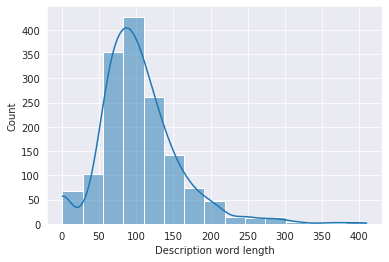

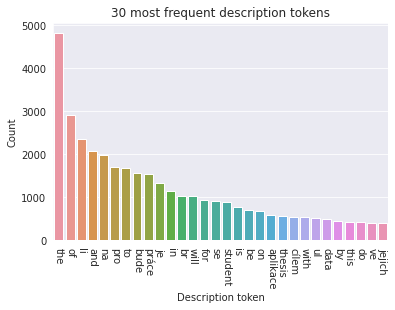

In [28]:
counts = df.description.apply(lambda t: len(t.strip()))
ax = sns.histplot(data=counts, kde=True)
ax.set(xlabel="Description character length", ylabel="Count")
plt.show()

counts = df.description.apply(lambda t: len(t.strip().split(" ")))
ax = sns.histplot(data=counts, kde=True, bins=15)
ax.set(xlabel="Description word length", ylabel="Count")
plt.show()

toks = []
for text in df.description:
    toks.extend(simple_preprocess(text))
toks = pd.Series(toks).value_counts().reset_index()
ax = sns.barplot(x="index", y=0, data=toks.sort_values(by=[0], ascending=False)[:30])
ax.set(xlabel="Description token", ylabel="Count", title="30 most frequent description tokens")
plt.xticks(rotation=270)
plt.show()

In [29]:
# Description is weird because sometimes it is english and sometimes czech/slovak

In [3]:
import pandas as pd
pd.DataFrame([
    
    ("keywords+metadata+bm25", "keywords+metadata", "0.19"),
    ("keywords+metadata", "keywords", "0.12"),
    ("keywords+metadata+bm25", "keywords", "0.06")
    
],
    columns=["model", "submodel", "mean jaccard score"]
)

,model,submodel,mean jaccard score
0,keywords+metadata+bm25,keywords+metadata,0.19
1,keywords+metadata,keywords,0.12
2,keywords+metadata+bm25,keywords,0.06
